In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Informasi data

Masalah yang akan dibahas adalah Bagaimana hotel dapat meningkatkan pendapatan berdasarkan pola pemesanan?

In [34]:
data = pd.read_csv('/content/drive/MyDrive/ANALISIS BIG DATA/DATASET/hotels.csv')

In [35]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [36]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [37]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

# Membersihkan data

In [38]:
# Periksa nilai yang hilang
missing_values = data.isnull().sum()
print("\nNilai yang hilang di setiap kolom:\n", missing_values)

data_cleaned = data.dropna()



Nilai yang hilang di setiap kolom:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent               

## Mengisi nilai hilang

In [39]:
# Hapus kolom agent, company, dan country
data = data.drop(columns=['agent', 'company'])
# Mengisi nilai hilang pada kolom 'children' dengan median
data['children'].fillna(data['children'].median(), inplace=True)
# Mengisi nilai hilang pada kolom 'country' dengan mode
data['country'].fillna(data['country'].mode()[0], inplace=True)


<ipython-input-39-6a46ca0a3648>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(data['children'].median(), inplace=True)
<ipython-input-39-6a46ca0a3648>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [40]:
print("Nilai yang hilang setelah pembersihan:\n", data.isnull().sum())


Nilai yang hilang setelah pembersihan:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spa

## Menggabungkan kolom

In [41]:
# Menggabungkan kolom stays_in_weekend_night dan stays_in_week_nights menjadi total_nights
data["total_stays"] = (data["stays_in_weekend_nights"] + data["stays_in_week_nights"])

# Hapus kolom stays_in_weekend_nights dan stays_in_week_nights"
data = data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

## Melakukan bining

In [42]:
# Melakukan Bining
bins = [0, 2, 5, 10, data["total_stays"].max()]  # Anda dapat menyesuaikan bin sesuai kebutuhan
labels = ['Pendek', 'Menengah', 'Panjang', 'Sangat Panjang']
data['total_stays_bin'] = pd.cut(data['total_stays'], bins=bins, labels=labels, right=False)

Penjelasan Label:
- Pendek: Total menginap singkat (0–2 malam).
- Menengah: Total menginap sedang (3–5 malam).
- Panjang: Total menginap lebih lama (6–10 malam).
- Sangat Panjang: Total menginap sangat lama (lebih dari 10 malam).

In [43]:
# Membuat kategori lead_time (interval) dengan label strategi pemasaran dalam bahasa Indonesia
bins = [0, 7, 30, 90, 365]  # Interval waktu dalam hari
labels = ['Pemesanan Mendadak', 'Pemesanan Jangka Pendek', 'Pemesanan Reguler', 'Pemesan Lebih Awal']  # Label dalam bahasa Indonesia
data['lead_time_bins'] = pd.cut(data['lead_time'], bins=bins, labels=labels)

Penjelasan Label:
- Pemesanan Mendadak: 0-7 hari sebelum kedatangan. Untuk tamu yang memesan mendekati waktu perjalanan.
- Pemesanan Jangka Pendek: 8-30 hari sebelum kedatangan. Untuk rencana perjalanan dalam waktu dekat.
- Pemesanan Reguler: 31-90 hari sebelum kedatangan. Untuk rencana perjalanan yang terencana.
- Pemesanan Awal: Lebih dari 90 hari sebelum kedatangan. Untuk tamu yang memesan jauh hari sebelumnya.

In [44]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_stays_bin,lead_time_bins
0,Resort Hotel,0,342,2015,July,27,1,2,0.0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,Pendek,Pemesan Lebih Awal
1,Resort Hotel,0,737,2015,July,27,1,2,0.0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,Pendek,NaN
2,Resort Hotel,0,7,2015,July,27,1,1,0.0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,Pendek,Pemesanan Mendadak
3,Resort Hotel,0,13,2015,July,27,1,1,0.0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,Pendek,Pemesanan Jangka Pendek
4,Resort Hotel,0,14,2015,July,27,1,2,0.0,0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,Menengah,Pemesanan Jangka Pendek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,0.0,0,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,Panjang,Pemesanan Jangka Pendek
119386,City Hotel,0,102,2017,August,35,31,3,0.0,0,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,Panjang,Pemesan Lebih Awal
119387,City Hotel,0,34,2017,August,35,31,2,0.0,0,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,Panjang,Pemesanan Reguler
119388,City Hotel,0,109,2017,August,35,31,2,0.0,0,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,Panjang,Pemesan Lebih Awal


# Analisa data

<ipython-input-45-8357650c25df>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='coolwarm')


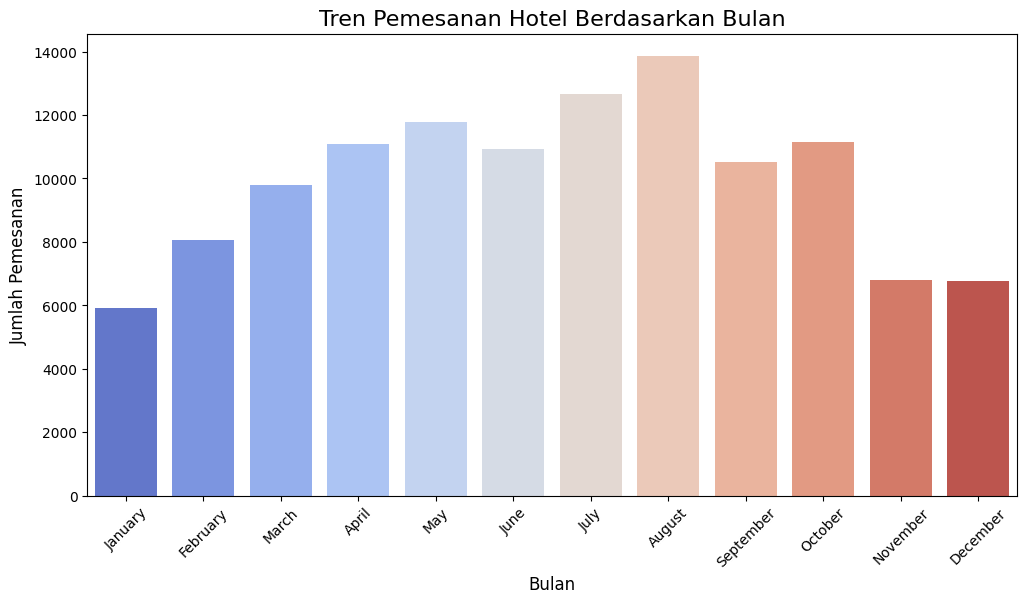

In [45]:
# Membuat kolom bulan sebagai urutan angka (1 untuk Januari, 2 untuk Februari, dst.)
data['arrival_date_month'] = pd.Categorical(
    data['arrival_date_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Menghitung jumlah pemesanan per bulan
monthly_bookings = data['arrival_date_month'].value_counts().sort_index()

# Visualisasi jumlah pemesanan per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='coolwarm')
plt.title('Tren Pemesanan Hotel Berdasarkan Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [46]:
# Menghitung seberapa banyak cancel untuk setiap jenis hotel
cancellation_rates = data.groupby('hotel')['is_canceled'].mean() * 100

<ipython-input-47-4ec021d3ba9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values, palette="Set2")


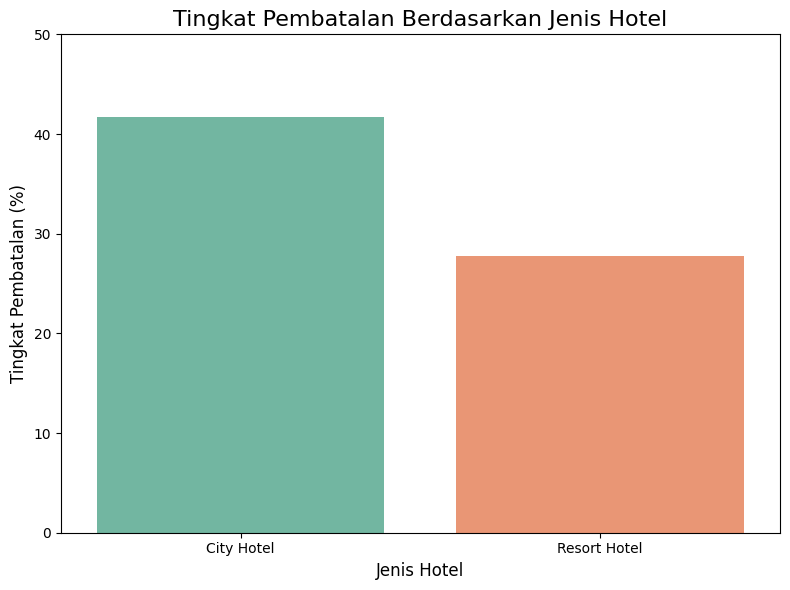

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values, palette="Set2")
plt.title('Tingkat Pembatalan Berdasarkan Jenis Hotel', fontsize=16)
plt.xlabel('Jenis Hotel', fontsize=12)
plt.ylabel('Tingkat Pembatalan (%)', fontsize=12)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()


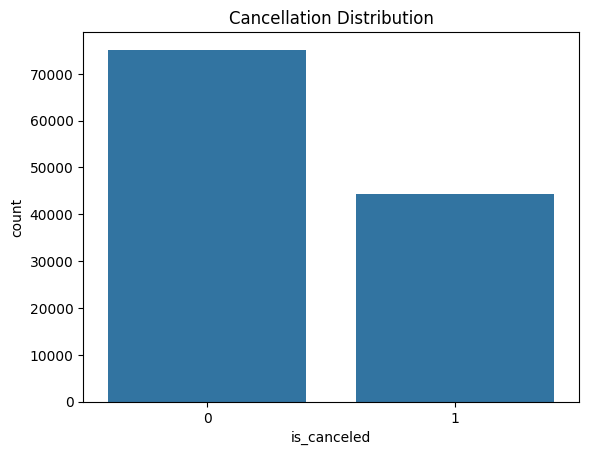

In [48]:
sns.countplot(data=data, x='is_canceled')
plt.title('Cancellation Distribution')
plt.show()

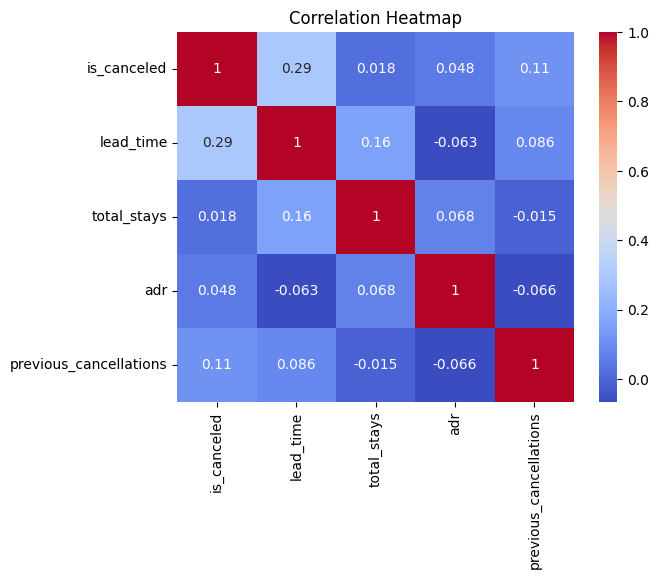

In [49]:
# Korelasi heatmap untuk mengidentifikasi fitur yang memengaruhi pembatalan
corr_features = ['is_canceled', 'lead_time', 'total_stays', 'adr', 'previous_cancellations']
sns.heatmap(data[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-50-1b590c8494dd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='customer_type', y='adr', ci=None)


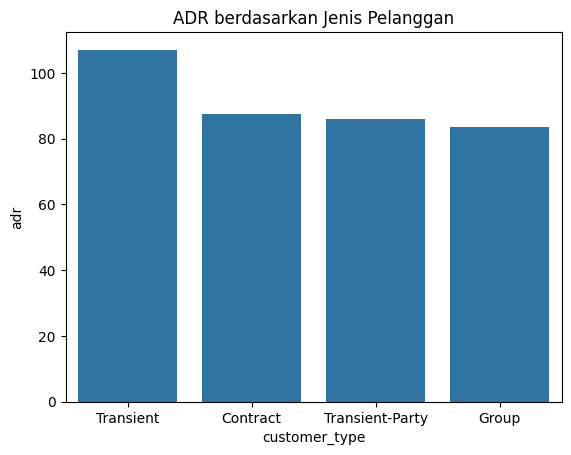

In [50]:
sns.barplot(data=data, x='customer_type', y='adr', ci=None)
plt.title('ADR berdasarkan Jenis Pelanggan')
plt.show()


<ipython-input-51-2bde2eac6a84>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='market_segment', y='adr', ci=None)


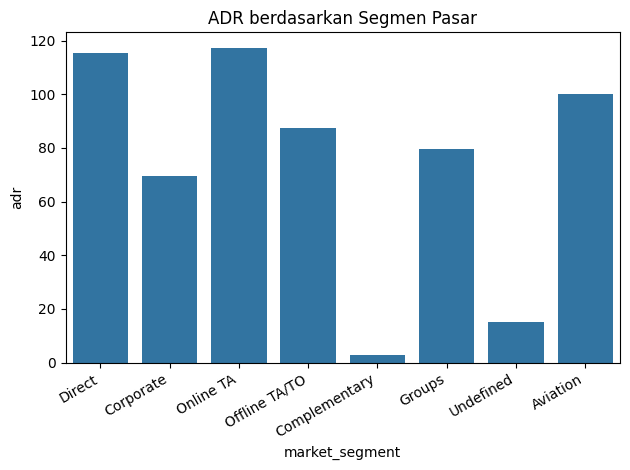

In [51]:
sns.barplot(data=data, x='market_segment', y='adr', ci=None)
plt.title('ADR berdasarkan Segmen Pasar')

# Tambahkan jarak antar kategori di sumbu x
plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotasi dan tata letak teks untuk jarak visual yang lebih baik
plt.tight_layout()  # Otomatis menyesuaikan layout untuk menghindari overlap
plt.show()


<ipython-input-52-74c0930a5ad4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['total_stays_bin', 'is_canceled'])['adr'].mean().reset_index()


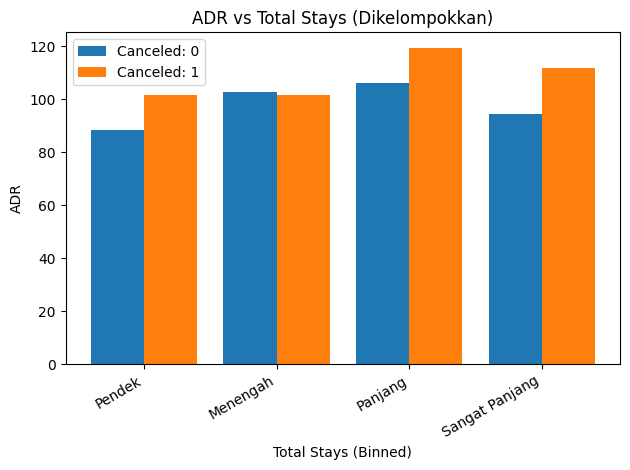

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung rata-rata ADR untuk setiap kategori
grouped_data = data.groupby(['total_stays_bin', 'is_canceled'])['adr'].mean().reset_index()

# Buat posisi x manual
categories = grouped_data['total_stays_bin'].unique()
x_pos = np.arange(len(categories)) * 2  # Kalikan dengan angka besar untuk menambah jarak antar bar

# Plot batang
for i, cancel_status in enumerate(grouped_data['is_canceled'].unique()):
    subset = grouped_data[grouped_data['is_canceled'] == cancel_status]
    plt.bar(
        x_pos + i * 0.8,  # Posisi batang, setiap status bergeser
        subset['adr'],
        width=0.8,
        label=f'Canceled: {cancel_status}'
    )

# Atur label dan layout
plt.xticks(x_pos + 0.4, categories, rotation=30, ha='right')  # Geser label agar sejajar
plt.title('ADR vs Total Stays (Dikelompokkan)')
plt.xlabel('Total Stays (Binned)')
plt.ylabel('ADR')
plt.legend()
plt.tight_layout()
plt.show()


Penjelasan Label:

- Pendek: Total menginap singkat (0–2 malam).
- Menengah: Total menginap sedang (3–5 malam).
- Panjang: Total menginap lebih lama (6–10 malam).
- Sangat Panjang: Total menginap sangat lama (lebih dari 10 malam).

<ipython-input-53-ca45fd8c5fab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_adr_per_meal.index, y=average_adr_per_meal.values, palette='muted')


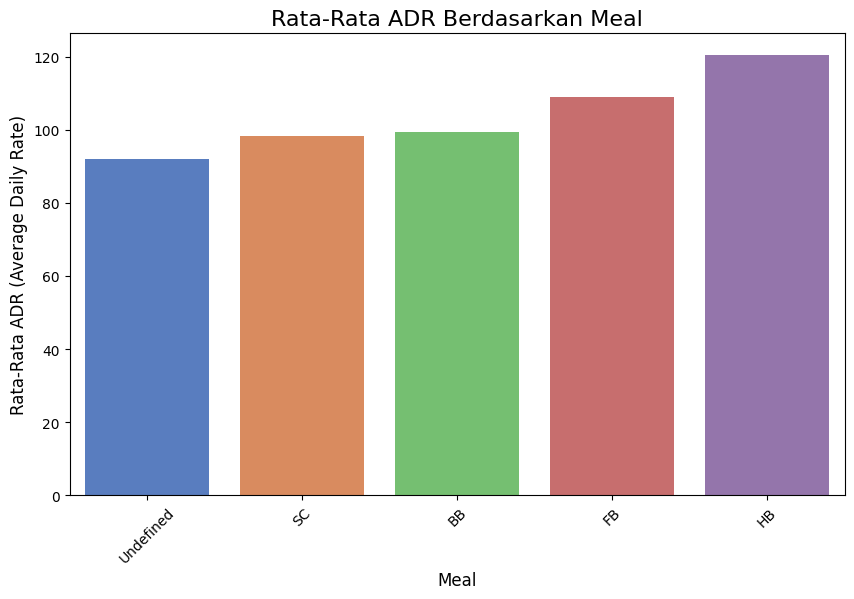

In [53]:
# Menghitung rata-rata ADR per kategori meal
average_adr_per_meal = data.groupby('meal')['adr'].mean().sort_values()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_adr_per_meal.index, y=average_adr_per_meal.values, palette='muted')
plt.title('Rata-Rata ADR Berdasarkan Meal', fontsize=16)
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Rata-Rata ADR (Average Daily Rate)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-54-dba5cab81ede>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_adr_per_lead_time = data.groupby('lead_time_bins')['adr'].mean()
<ipython-input-54-dba5cab81ede>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_adr_per_lead_time.index, y=average_adr_per_lead_time.values, palette='coolwarm')


Text(0, 0.5, 'Rata-Rata ADR (Average Daily Rate)')

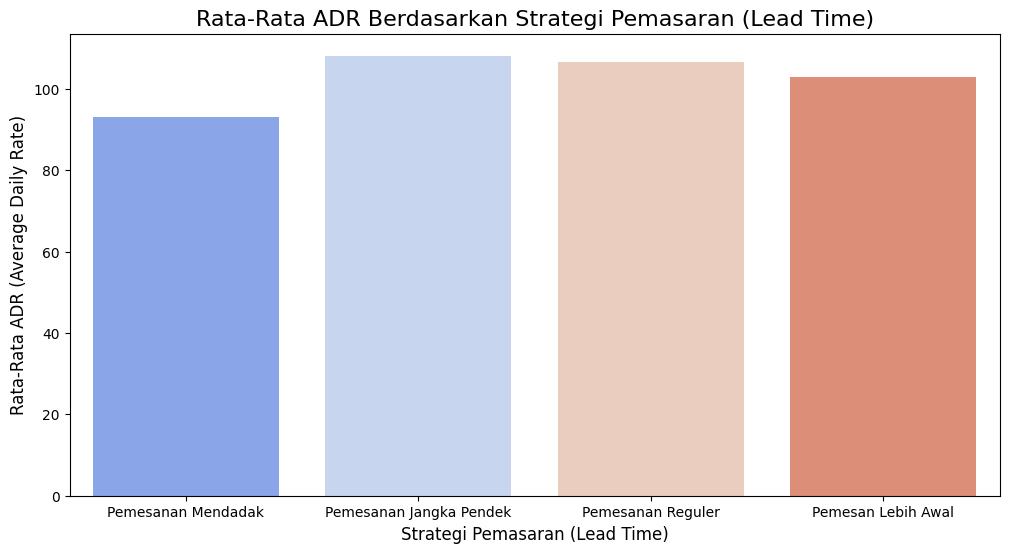

In [54]:
# Menghitung rata-rata ADR berdasarkan kategori lead_time
average_adr_per_lead_time = data.groupby('lead_time_bins')['adr'].mean()

# Membuat bar plot
plt.figure(figsize=(12, 6))  # Ukuran grafik diperbesar
sns.barplot(x=average_adr_per_lead_time.index, y=average_adr_per_lead_time.values, palette='coolwarm')
plt.title('Rata-Rata ADR Berdasarkan Strategi Pemasaran (Lead Time)', fontsize=16)
plt.xlabel('Strategi Pemasaran (Lead Time)', fontsize=12)
plt.ylabel('Rata-Rata ADR (Average Daily Rate)', fontsize=12)


<ipython-input-57-bea3e82fe809>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate = data.groupby('lead_time_bins')['is_canceled'].mean() * 100  # Menghitung rata-rata pembatalan (dalam persen)
<ipython-input-57-bea3e82fe809>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette='Reds')


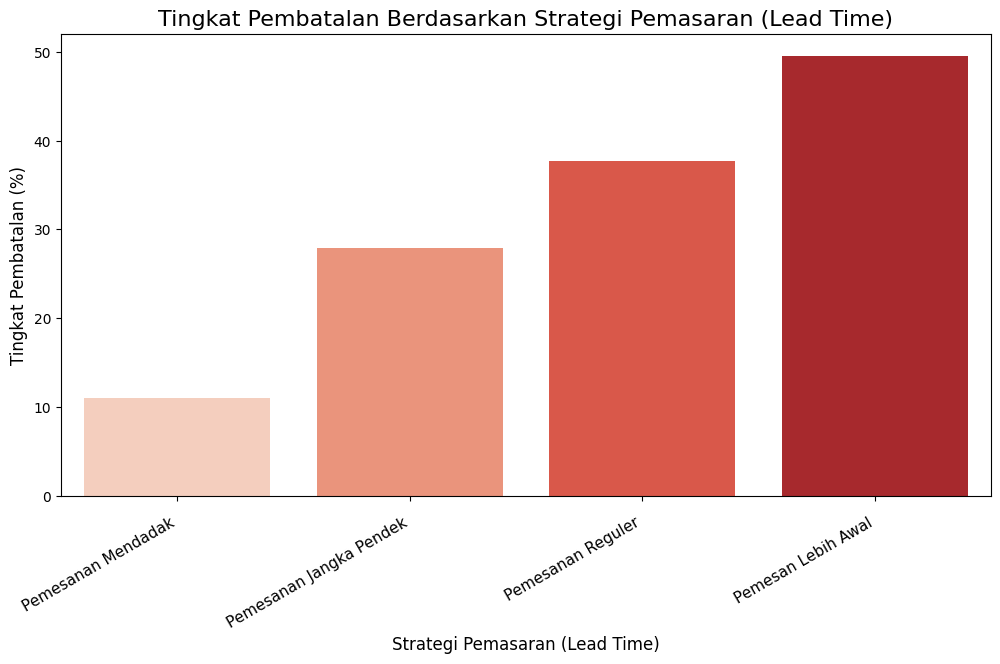

In [57]:
# Menghitung persentase pembatalan berdasarkan kategori lead_time
cancellation_rate = data.groupby('lead_time_bins')['is_canceled'].mean() * 100  # Menghitung rata-rata pembatalan (dalam persen)

# Membuat bar plot
plt.figure(figsize=(12, 6))  # Ukuran grafik diperbesar
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette='Reds')
plt.title('Tingkat Pembatalan Berdasarkan Strategi Pemasaran (Lead Time)', fontsize=16)
plt.xlabel('Strategi Pemasaran (Lead Time)', fontsize=12)
plt.ylabel('Tingkat Pembatalan (%)', fontsize=12)

# Menambahkan jarak pada label sumbu X
plt.xticks(rotation=30, fontsize=11, ha='right')  # Menyesuaikan jarak dan orientasi label
plt.tick_params(axis='x', which='major', pad=10) # Menambahkan pad menggunakan tick_params


plt.show()

In [58]:
# Hitung rata-rata ADR untuk jenis pelanggan dan segmen pasar
adr_summary = data.groupby(['customer_type', 'market_segment'])['adr'].mean().reset_index()
print("Rata-rata ADR menurut Jenis Pelanggan dan Segmen Pasar:")
print(adr_summary.sort_values(by='adr', ascending=False))

Rata-rata ADR menurut Jenis Pelanggan dan Segmen Pasar:
      customer_type market_segment         adr
19        Transient      Online TA  118.272810
16        Transient         Direct  116.669532
5          Contract      Online TA  110.068856
6             Group       Aviation  110.000000
26  Transient-Party      Online TA  106.030202
23  Transient-Party         Direct  105.908075
13        Transient       Aviation  100.177431
20  Transient-Party       Aviation   98.529412
9             Group         Direct   97.591045
25  Transient-Party  Offline TA/TO   92.288061
12            Group      Online TA   87.235978
17        Transient         Groups   86.646942
18        Transient  Offline TA/TO   85.638857
8             Group      Corporate   83.248276
4          Contract  Offline TA/TO   79.940248
11            Group  Offline TA/TO   75.249336
24  Transient-Party         Groups   74.992835
22  Transient-Party      Corporate   72.547998
15        Transient      Corporate   67.879416
3   